# 重回帰分析
2つの説明変数と関係しない変数の誤ったモデル

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

from mpl_toolkits.mplot3d import Axes3D # for 3D-graph, 明示的には使わないが、インポートしておく必要がある

np.random.seed(123) #再現性を得るため
FLAG_fig = False

## F検定の値を見る
真のシステム：y = b1*x1 + b2*x2 + noise  
モデル:　y = b1*x1 + b2*x2

In [2]:
num = 30
noise = np.random.normal(0.0, 0.1, num)
rad = np.linspace(-np.pi,np.pi,num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

In [3]:
b1, b2 = 1.1, -0.55 # beta_0, beta_1
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              5114.
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                    1.28e-36
Time:                        17:53:53   Log-Likelihood:                          23.316
No. Observations:                  30   AIC:                                     -42.63
Df Residuals:                      28   BIC:                                     -39.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1478      0.031     36.466      0.000       1.083       1.212
x2            -0.5564      0.006   -100.747      0.000      -0.568      -0.545
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.872
Skew:                           0.350   Prob(JB):                        0.647
Kurtosis:                       2.545   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
b1, b2 = 0.0001, -0.000055
y = b1*x1 + b2*x2 + noise
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2})
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.094
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              1.451
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                       0.251
Time:                        17:53:53   Log-Likelihood:                          23.316
No. Observations:                  30   AIC:                                     -42.63
Df Residuals:                      28   BIC:                                     -39.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0479      0.031      1.521      0.140      -0.017       0.112
x2            -0.0064      0.006     -1.160      0.256      -0.018       0.005
==============================================================================
Omnibus:                        0.861   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.872
Skew:                           0.350   Prob(JB):                        0.647
Kurtosis:                       2.545   Cond. No.                         5.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 多重共線性（multicollinearity）の影響を見る

In [5]:
num = 30
rad = np.linspace(-np.pi, np.pi, num)
x1 = np.sin(rad)
x2 = np.random.normal(-2.0, 3.0, num)

b1, b2 = 3.3, -1.25
noise = 0.001*np.random.normal( 0.0, 1.0, num)
y = b1*x1 + b2*x2 + noise

関係のないx3を測定したと仮定する

In [6]:
x3 = 3.35*np.sin((rad+0.001))+ 0.001*np.random.normal( 0.0, 1.0, num)
df = pd.DataFrame({'y':y, 'x1':x1, 'x2':x2, 'x3':x3})

In [7]:
results = smf.ols('y ~ x1 + x2 + x3 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.948e+08
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                    4.00e-99
Time:                        17:53:53   Log-Likelihood:                          160.31
No. Observations:                  30   AIC:                                     -314.6
Df Residuals:                      27   BIC:                                     -310.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3508      0.311     10.771      0.000       2.712       3.989
x2            -1.2500    5.9e-05  -2.12e+04      0.000      -1.250      -1.250
x3            -0.0152      0.093     -0.163      0.872      -0.206       0.175
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.362
Skew:                           0.076   Prob(JB):                        0.834
Kurtosis:                       2.483   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

"The condition number is large"というWarningメッセージが出た場合。<br>
condition number（条件数）は、行列の固有値から計算される数値であり、この値が大きいほど連立方程式が解きにくくなり、<br>
解に誤差を含む可能性が高いことを示唆する。したがって、出力された数値解は、盲目的に信じることなく、注意して見守る必要がある。

#### モデル次数をシステムに合わせる

In [8]:
results = smf.ols('y ~ x1 + x2 -1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.027e+08
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                   2.05e-103
Time:                        17:53:53   Log-Likelihood:                          160.30
No. Observations:                  30   AIC:                                     -316.6
Df Residuals:                      28   BIC:                                     -313.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3000      0.000   1.05e+04      0.000       3.299       3.301
x2            -1.2500   5.68e-05   -2.2e+04      0.000      -1.250      -1.250
==============================================================================
Omnibus:                        0.219   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.420
Skew:                           0.076   Prob(JB):                        0.811
Kurtosis:                       2.440   Cond. No.                         5.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ３Dプロット，
参照　https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

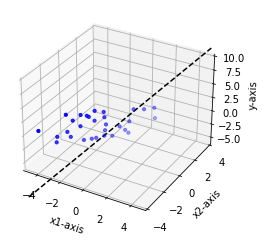

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルの設定
ax.set_xlabel("x1-axis")
ax.set_ylabel("x2-axis")
ax.set_zlabel("y-axis")

# 表示範囲の設定
ax.set_xlim(-5, 5)
ax.set_ylim(-4, 4)
ax.set_zlim(-6, 10)

#観測データのプロット
ax.scatter(x1, x2, y, s=10, color='blue')

# モデル式の表示
xx1 = np.linspace(-5,5,num)
xx2 = np.linspace(-4,4,num)

c1, c2 = results.params

y0 = c1*xx1 + c2*xx2
ax.plot(xx1, xx2, y0, color='black', linestyle='dashed')
plt.show()

In [ ]:
result.